In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/ek/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the abalone dataset
dataset = pd.read_csv('abalone.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [4]:
dataset.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [5]:
dataset.isnull().sum() #checking for null values

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
rings             0
dtype: int64

# SInce we have both categorical and numerical values, we will be using one hot enconding for the sex variable to distinguish between M, F and Infant.
### If sex_I is 1, the abalone is an Infant.
### If sex_M is 1, the abalone is Male.
### If both sex_I and sex_M are 0, the abalone is Female.


In [8]:
# Apply one-hot encoding
dataset_encoded = pd.get_dummies(dataset, columns=['sex'], drop_first=True)

# Explicitly convert the boolean values to integers
dataset_encoded['sex_I'] = dataset_encoded['sex_I'].astype(int)
dataset_encoded['sex_M'] = dataset_encoded['sex_M'].astype(int)

# Reorder the columns
column_order = ['sex_I', 'sex_M'] + [col for col in dataset if col != 'sex']
dataset_reorder = dataset_encoded[column_order]

dataset_reorder.head() 

,sex_I,sex_M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,1,91,73,19,102.8,44.9,20.2,30.0,15
1,0,1,70,53,18,45.1,19.9,9.7,14.0,7
2,0,0,106,84,27,135.4,51.3,28.3,42.0,9
3,0,1,88,73,25,103.2,43.1,22.8,31.0,10
4,1,0,66,51,16,41.0,17.9,7.9,11.0,7


In [9]:
dataset.describe() #checking thr mean,std,min,max

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


# Using Linear regression to predict the rings variable (dependent). 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

In [18]:
#we'll use 'rings' as the target and all other columns as features
X = dataset_reorder.drop('rings', axis=1)
y = dataset_reorder['rings']

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:
# Initialize and train the Linear Regression model
model = LinearRegression()

In [21]:
X_train.head()

,sex_I,sex_M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
3141,1,0,36,27,16,6.6,2.9,1.4,2.0
3521,1,0,43,30,11,8.2,3.0,1.8,2.5
883,0,1,132,106,34,278.1,118.1,42.4,90.6
3627,0,1,143,105,40,378.0,190.0,87.2,86.1
2106,0,1,119,91,31,208.2,83.2,42.1,73.0


In [22]:
model.fit(X_train, y_train) #fitting the model

/Users/ek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [23]:
# Making Predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

/Users/ek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


/Users/ek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


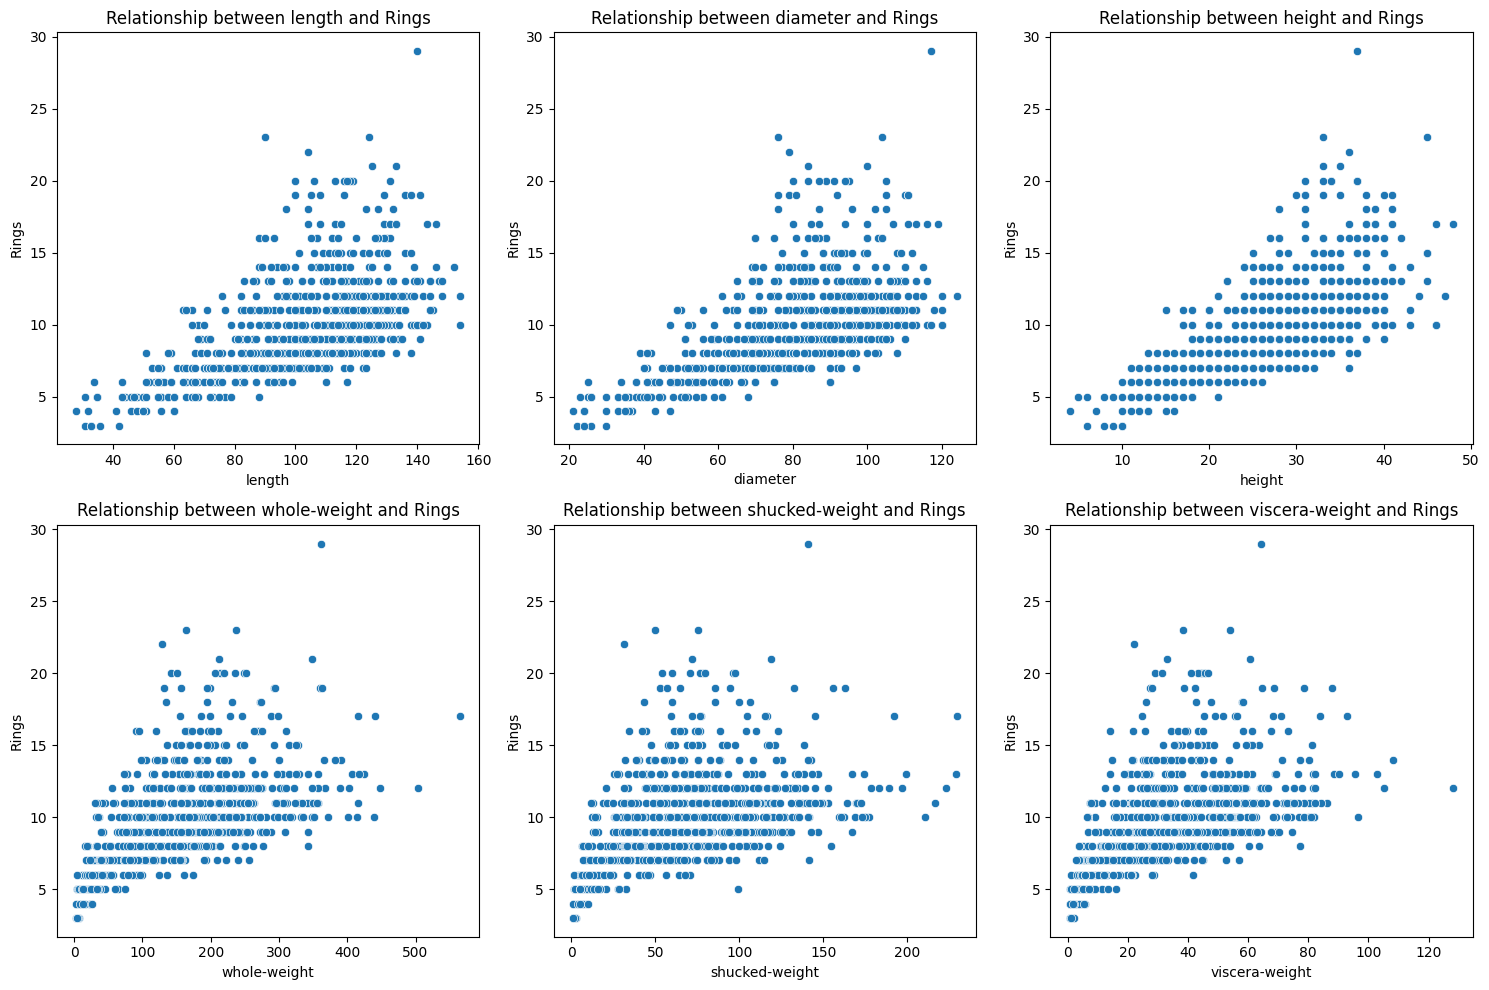

In [25]:
# Checking for linear relationship by plotting each predictor with the target variable
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(['length', 'diameter', 'height', 'whole-weight', 'shucked-weight', 'viscera-weight']):
    sns.scatterplot(x=X_test[feature], y=y_test, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Relationship between {feature} and Rings')
    axs[i//3, i%3].set_xlabel(feature)
    axs[i//3, i%3].set_ylabel('Rings')

plt.tight_layout()
plt.show()

### Checking the relationship between the target variable and each independent variable

In [26]:
# Checking for the independence using Durbin-Watson test
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.9758699097144017


### the Durbin-Watson statistic is 1.9758699097144017, which is very close to 2. This suggests that there is little to no autocorrelation in the residuals of my regression model. It indicates that my model does not suffer significantly from the problem of autocorrelation, which is a desirable property in most regression analyses.

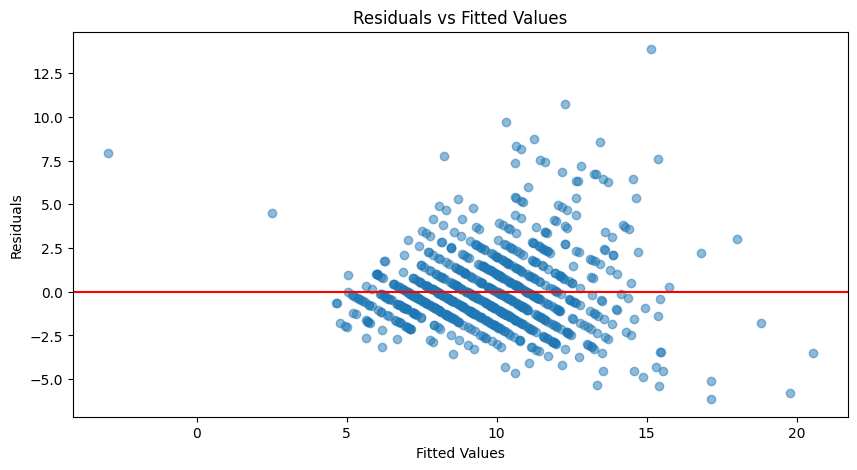

In [27]:
# Homoscedasticity check
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

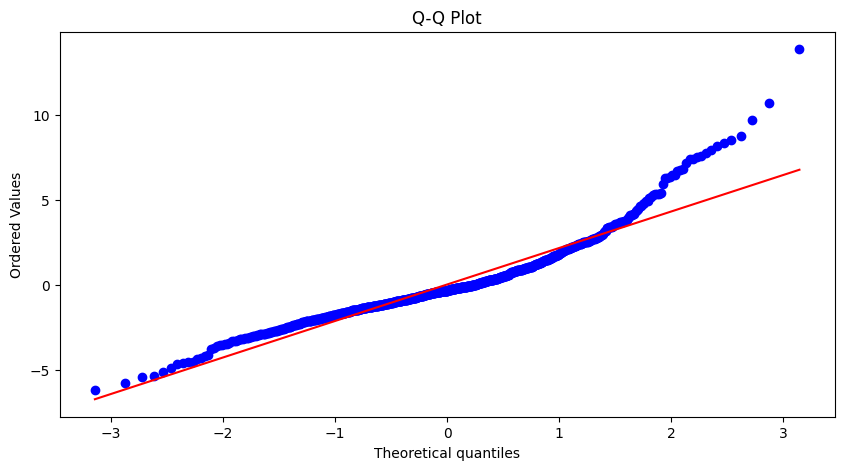

In [28]:
# Normality check using Q-Q plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### The normality check is evenly distributed with the exception of a few outliers

## Lets use Breusch-Pagan test to check for homoscedasticity in the linear regression model

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant


In [36]:
# Adding a constant term (column of ones) to represent the intercept
X_test_with_constant = add_constant(X_test)

# Performing the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_test_with_constant)

In [37]:
bp_statistic, bp_pvalue = bp_test[:2]

print(f"Breusch-Pagan Test Statistic: {bp_statistic}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue}")

# Interpretation
if bp_pvalue < 0.05:
    print("The test suggests heteroscedasticity (non-constant variance in residuals).")
else:
    print("The test suggests homoscedasticity (constant variance in residuals).")

Breusch-Pagan Test Statistic: 100.06122373280975
Breusch-Pagan Test p-value: 1.5292843573633755e-17
The test suggests heteroscedasticity (non-constant variance in residuals).


###### Since the p-value is much smaller than the common alpha level of 0.05, this means the test has found evidence of heteroscedasticity. In other words, the variance of the residuals is not constant across the range of values in your data; it changes depending on the level of the independent variables. This violates one of the key assumptions of linear regression. The test statistic is a measure of how much the variances of the residuals differ from the mean variance. A larger test statistic indicates a greater divergence from homoscedasticity.

## Lets check for outliers using cook's distance

In [38]:
import statsmodels.api as sm

In [39]:
X_with_constant = sm.add_constant(X)  # Adding a constant for the intercept
model_sm = sm.OLS(y, X_with_constant).fit()

In [40]:
# Calculating Cook's distance
influence = model_sm.get_influence()
(c, p) = influence.cooks_distance


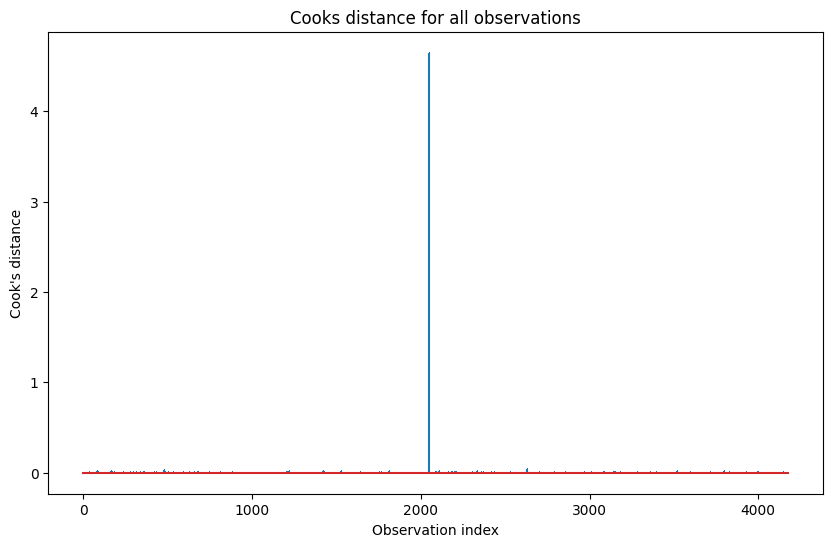

In [41]:
# Plotting Cook's distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cooks distance for all observations')
plt.xlabel('Observation index')
plt.ylabel("Cook's distance")
plt.show()

In [42]:
# Identify potential outliers
potential_outliers = np.where(c > 4 / len(c))[0]X

#### In the plot, a singular observation markedly exceeds the threshold, suggesting it is an outlier with considerable leverage. This could indicate a data point that is either a statistical anomaly or a measurement error, warranting further scrutiny. The remaining data points cluster near the horizontal axis, implying minimal influence on the model's outcome. The outlier's presence could skew the regression line, leading to biased estimates and predictions.

# Step 6 
### To mitigate the impact of outliers on a regression model, one can take several approaches, depending on the nature of the outlier and the context of the data. Here are some strategies:

Removal: If the outlier is a result of a clear error in data collection or entry, it can simply be removed from the dataset. However, care must be taken not to arbitrarily remove data points that are merely inconvenient, as they could represent valuable extremes in the actual distribution.

Transformation: Applying a mathematical transformation to the entire dataset can reduce the influence of outliers. Common transformations include the logarithm, square root, or Box-Cox transformation. These transformations can compress the scale of the data, pulling in the outliers.

### Implementing removing of outlier

In [45]:
# Creating a new dataset without the outliers
cleaned_df = dataset_reorder.drop(index=potential_outliers)

In [46]:
cleaned_df.head()

,sex_I,sex_M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
1,0,1,70,53,18,45.1,19.9,9.7,14.0,7
2,0,0,106,84,27,135.4,51.3,28.3,42.0,9
3,0,1,88,73,25,103.2,43.1,22.8,31.0,10
4,1,0,66,51,16,41.0,17.9,7.9,11.0,7
5,1,0,85,60,19,70.3,28.2,15.5,24.0,8


## Step 4 and 5 using the cleaned dataset

In [47]:
# Prepare the data for modeling
X_cleaned = cleaned_df.drop('rings', axis=1)  # Predictor variables
y_cleaned = cleaned_df['rings']               # Target variable

In [48]:
# Split the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [49]:
# Initialize and train the linear regression model with cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

/Users/ek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [50]:
# Predict the values for the testing data
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

/Users/ek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [51]:
# Calculating the residuals
residuals_cleaned = y_test_cleaned - y_pred_cleaned

In [53]:
# Performing the Breusch-Pagan test
from statsmodels.tools import add_constant

# Adding a constant term to the independent variables for the intercept
X_test_cleaned_with_constant = add_constant(X_test_cleaned)

# Now, performing the Breusch-Pagan test again with the modified independent variables
bp_test_cleaned = het_breuschpagan(residuals_cleaned, X_test_cleaned_with_constant)

# Extracting the test statistic and p-value
bp_statistic_cleaned, bp_pvalue_cleaned = bp_test_cleaned[:2]

In [54]:
print(f"Breusch-Pagan Test Statistic: {bp_statistic_cleaned}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue_cleaned}")

# Interpretation
if bp_pvalue_cleaned < 0.05:
    print("The test suggests heteroscedasticity (non-constant variance in residuals).")
else:
    print("The test suggests homoscedasticity (constant variance in residuals).")

Breusch-Pagan Test Statistic: 47.4251979399456
Breusch-Pagan Test p-value: 3.2699958598478214e-07
The test suggests heteroscedasticity (non-constant variance in residuals).


In [64]:
# Add a constant term to the independent variables for the intercept
X_cleaned_with_constant = sm.add_constant(X_cleaned)

# Fit the OLS model using the cleaned dataset with a constant term
model_cleaned = sm.OLS(y_cleaned, X_cleaned_with_constant).fit()


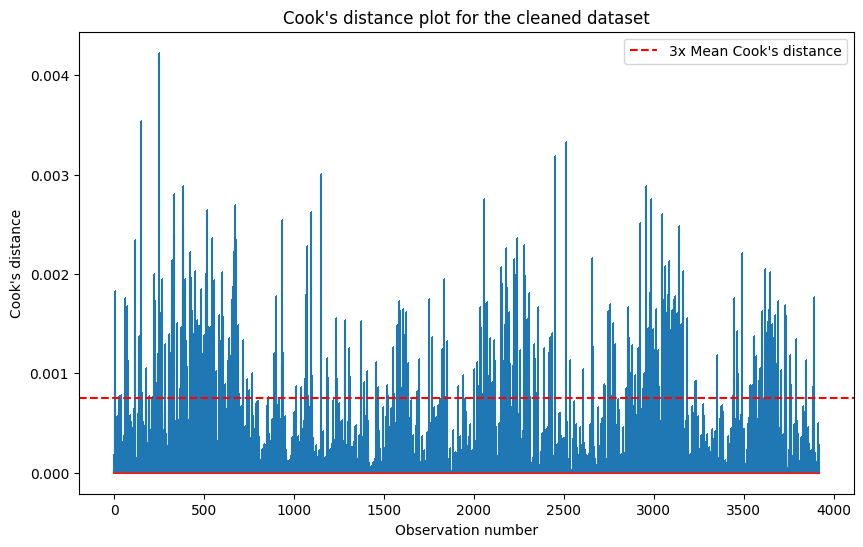

In [66]:
# Calculate Cook's distance for the cleaned dataset
influence_cleaned = model_cleaned.get_influence()
cooks_d_cleaned = influence_cleaned.cooks_distance[0]
# Plot Cook's distance for the cleaned dataset
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d_cleaned)), cooks_d_cleaned, markerfmt=",")
plt.title('Cook\'s distance plot for the cleaned dataset')
plt.xlabel('Observation number')
plt.ylabel('Cook\'s distance')
plt.axhline(y=np.mean(cooks_d_cleaned) * 3, color='red', linestyle='--', label='3x Mean Cook\'s distance')
plt.legend()
plt.show()

#### In the cleaned plot, while there are many spikes indicating observations with higher Cook's distance values, it appears that none exceed the threshold. This suggests that there are no individual observations with a disproportionately large influence on the regression model's coefficients. In other words, there are not any significant outliers in the sense that they are unduly influencing the overall regression fit. It's a sign that the model is relatively stable and not being skewed by extreme values again prior to the previous cook's plot.

## Calculating the VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# We will calculate VIF for each variable in the model
vif_data = pd.DataFrame()
vif_data["feature"] = X_cleaned.columns

In [70]:
#Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]
vif_data

,feature,VIF
0,sex_I,2.598663
1,sex_M,2.122478
2,length,819.746685
3,diameter,837.654441
4,height,91.843498
5,whole-weight,659.290350
6,shucked-weight,154.292254
7,viscera-weight,79.709112
8,shell-weight,118.227522
